# 01-07-21
## 오차 역전파 이론 학습
* 변미분
* 필요성
* 계산 과정 학습

# 01-08-21
## 역전파 구현하기( 계산기 )
### 덧셈 노드
* 순전파 : 단순히 두 값을 더한다
* 역전파 : 다음 노드로부터 들어온 미분값을 그대로 흘려 보낸다.
* 순전파 시에 입력된 값을 저장하고 있을 필요는 없다

In [1]:
import numpy as np

In [2]:
class AddLayer:
    
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

### 곱셈 노드
* 순전파 : 두 값을 곱해준다.
* 역전파 : 들어온 두 값에 미분 값을 곱해서 반대로 전달한다.
* 곱할 값을들 가지고 있어야 한다. 
    * **역전파**시에 미분값을 곱한 다음 반대로 전달하기 위해

In [3]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self,x, y):
        # 계산할 값들을 노드에 저장하고 있는다
        self.x = x
        self.y = y
        
        out = x * y
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy

In [4]:
# 사과만 테스트
apple = 100
apple_cnt = 2
tax = 1.1

# 필요 계층 = 2
# (apple * apple_cnt) * tax

# 레이어 준비
mul_apple_layer = MulLayer()
mul_tax = MulLayer()

# 순전파 진행
apple_price = mul_apple_layer.forward(apple, apple_cnt)
price = mul_tax.forward(apple_price, tax)

print("최종 사과 가격 : {}".format(price))

최종 사과 가격 : 220.00000000000003


In [5]:
# 역전파 구현

dprice = 1 # d돈통 / d포스기
dapple_price, dtax = mul_tax.backward(dprice)
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)

print("사과 가격 * 사과 개수에 대한 미분 값 : {}".format(dapple_price))
print("사과 가격에 대한 미분 값 : {}".format(dapple))
print("사과 개수에 대한 미분 값 : {}".format(dapple_cnt))
print("소비세에 대한 미분 값 : {}".format(dtax))

사과 가격 * 사과 개수에 대한 미분 값 : 1.1
사과 가격에 대한 미분 값 : 2.2
사과 개수에 대한 미분 값 : 110.00000000000001
소비세에 대한 미분 값 : 200


### 다중 항목 구현

In [6]:
# 사과와 귤 계산하기
apple = 100
apple_cnt = 2

orange = 150
orange_cnt = 3

tax = 1.1

#### 1계층
* 각 과일에 대한 개수 계산( 과일 가격 * 개수 )

In [7]:
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()

#### 2계층
* 사과 가격 + 오렌지 가격

In [8]:
add_apple_orange_layer = AddLayer()

#### 3계층
* 과일들의 총 가격 * 소비세

In [9]:
mul_tax_layer = MulLayer()

#### 연산 수행(순전파)

In [10]:
# 1계층
apple_price = mul_apple_layer.forward(apple, apple_cnt)
orange_price = mul_orange_layer.forward(orange, orange_cnt)

# 2계층
total_price = add_apple_orange_layer.forward(apple_price, orange_price)

# 3계층
price = mul_tax_layer.forward(total_price, tax)

print("최종 가격 : {}".format(int(price)))

최종 가격 : 715


#### 연산 수행( 역전파)

In [11]:
dprice = 1
dtotal_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dtotal_price)
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)
dorange, dorange_cnt = mul_orange_layer.backward(dorange_price)

print("소비세에 대한 미분 값 : {}".format(dtax))
print("전체 가격에 대한 미분 값 : {}".format(dtotal_price))
print("")
print("오렌지 가격 * 오렌지 개수에 대한 미분 값 : {}".format(dorange_price))
print("오렌지 가격에 대한 미분 값 : {}".format(dorange))
print("오렌지 개수에 대한 미분 값 : {}".format(dorange_cnt))
print("")
print("사과 가격 * 사과 개수에 대한 미분 값 : {}".format(dapple_price))
print("사과 가격에 대한 미분 값 : {}".format(dapple))
print("사과 개수에 대한 미분 값 : {}".format(dapple_cnt))


소비세에 대한 미분 값 : 650
전체 가격에 대한 미분 값 : 1.1

오렌지 가격 * 오렌지 개수에 대한 미분 값 : 1.1
오렌지 가격에 대한 미분 값 : 3.3000000000000003
오렌지 개수에 대한 미분 값 : 165.0

사과 가격 * 사과 개수에 대한 미분 값 : 1.1
사과 가격에 대한 미분 값 : 2.2
사과 개수에 대한 미분 값 : 110.00000000000001


## 신경망 레이어 만들기
* ReLU
* Sigmoid
* Affine 레이어
* SoftMax + Loss 레이어

### ReLU

In [12]:
class ReLU:
    # mask : 순전파 시에 0이나 음수였던 인덱스를 저장하기 위함
    # mask가 있어야 순전파 때 0이였던 부분을 역전파 때 0으로 만들어 줄 수 있다
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy() # 원본 배열 복사
        out[self.mask] = 0
        
        return out
    
    # 순전파시 음수였던 부분을 0으로 변환
    # 음수였던 인덱스를 미분 전달시 self.mask 를 통해 해당 인덱스를 0으로 만든다
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

### Sigmoid

In [13]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / ( 1 + np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * self.out * (1.0 - self.out)
        return dx

### Affine 레이어
* 기하학에서 행렬의 내적을 Affine 변환( Affine Transformation ) 이라고 한다

In [14]:
# Affine 변환 알아보기
x = np.random.rand(2)
w = np.random.rand(2, 3)
b = np.random.rand(3)

x.shape, w.shape, b.shape

((2,), (2, 3), (3,))

In [15]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        # 방어 코드 : 원본  x의 모양이 변하는 것을 방지하기 위함
        self.original_x_shape = None
        
        # 최적화(Optimazaion)을 위해 각 매개변수와 미분값을 가지고 있어야 한다.
        # 경사하강법 등을 구현하기 위해 사용
        # dw, db를 update 하는 것을  << 학습 >>
        self.dw = None
        self.db = None
        
    def forward(self, x):
        # 텐서 대응( 배치마다의 데이터의 개수를 평평하게 사용함)
        # 몇차원 배열이 들어오든 (N, M)으로 변환
        # ex) (3, 4, 4) => 제일 앞의 3이 배치의 개수를 의미 => (3, 16)
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        
        self.x = x
        
        out = np.dot(self.x, self.W) + self.b
        return out
    
    def backward(self, dout):
        # dL / dx => dout * W의 전치 행렬
        dx = np.dot(dout, self.W.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        # dx를 원본형상으로 복구
        dx = dx.reshape(*self.original_x_shape)
        return dx

### Softmax + Loss 계층
* softmax에 의한 classification 및 cee를 활용한 손실함수를 동시에 구현
* 순전파 시에는 softmax 적용 후 loss 적용
    * 정답 레이블, 예측 레이블( softmax결과물 ), loss를 갖는다
* 역전파 시에 오차를 구해서 이전층에 전달

In [16]:
from common.functions import softmax, cross_entropy_error    

In [17]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    '''
        x: 이전층에서 들어온 값
        t: 정답 레이블
    '''
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        
        # 출력층의 원소의 개수를 비교하는 것은 원-핫 인코딩이 되어있는 레이블이라는 뜻
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
            
        return dx

### 네트워크 생성 및 조립

In [18]:
# 레이어마다 이름을 붙여주고, 레이어의 추가순서를 항상 유지
# 원래 딕셔너리를 활용하는데, 일반 딕셔너리는 데이터의 추가의 순서를 유지 하지 않는다.
# 키값도 사용하면서, 동시에 추가 순서도 유지하기 위해 OrderedDict

from collections import OrderedDict

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01 ):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        
        # 레이어 만들기
        self.layers = OrderedDict()
        
        # Fully Connected #1
        self.layers['Affine1'] = Affine(self.params["W1"], self.params["b1"])
        # Activation
        self.layers["ReLU1"] = ReLU()
        
        # Fully Connected #2(츨력층)
        self.layers["Affine2"] = Affine(self.params["W2"], self.params["b2"])
        
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        
        # 원-핫 인코딩 처리
        if t.ndim != 1 : np.argmax(t, axis=1)
            
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)
        
        # 역전파
        dout = 1 # dL / dL
        dout = self.lastLayer.backward(dout) # 순수한 오차
        
        layers = list(self.layers.values()) # 레이어를 모두 가지고 온 다음
        layers.reverse() # 순서 뒤집기
        
        for layer in layers:
            dout = layer.backward(dout)
            
        # 구해진 기울기 배열 저장
        grads = {}
        grads["W1"], grads["b1"] = self.layers["Affine1"].dw, self.layers["Affine1"].db
        grads["W2"], grads["b2"] = self.layers["Affine2"].dw, self.layers["Affine2"].db
        
        return grads

* 데이터 로드( mnist 사용 )

In [19]:
from tensorflow.keras import datasets
mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

from sklearn.preprocessing import OneHotEncoder
y_train_dummy = OneHotEncoder().fit_transform(y_train.reshape(-1, 1))
y_train_dummy = y_train_dummy.toarray()

y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))
y_test_dummy = y_test_dummy.toarray()

# feature 전처리
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train / 255.0 # 이미지 정규화 기법. 255.0 으로 나눠주면 모든 픽셀 데이터가 0 ~ 1사이의 값을 갖게 되고, 훈련이 쉽게 된다.

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test / 255.0

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [20]:
network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

iter_num = 10000

# 미니 배치 때문에 선언함
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 에폭 횟수 구하기

for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    t_batch = y_train[batch_mask]
    
    # 기울기 계산
    # grads = network.numerical_gradient_params(X_batch, t_batch) # 수치미분은 사용 X
    grads = network.gradient(x_batch, t_batch) # 오차 역전파 방식
    
    # 경사 하강법을 이용한 매개변수 계산
    
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grads[key]
        
    loss = network.loss(x_batch, t_batch)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, y_train)
        test_acc  = network.accuracy(X_test, y_test)
        train_loss_list.append(loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("Train Accuracy : {:.6f} / Test Accuracy : {:.6f}".format(train_acc, test_acc))
    

Train Accuracy : 0.116700 / Test Accuracy : 0.120600
Train Accuracy : 0.904850 / Test Accuracy : 0.906700
Train Accuracy : 0.923667 / Test Accuracy : 0.925200
Train Accuracy : 0.930817 / Test Accuracy : 0.929600
Train Accuracy : 0.943350 / Test Accuracy : 0.940200
Train Accuracy : 0.949200 / Test Accuracy : 0.945400
Train Accuracy : 0.955717 / Test Accuracy : 0.949600
Train Accuracy : 0.960417 / Test Accuracy : 0.955500
Train Accuracy : 0.962950 / Test Accuracy : 0.957600
Train Accuracy : 0.967167 / Test Accuracy : 0.961700
Train Accuracy : 0.968583 / Test Accuracy : 0.963200
Train Accuracy : 0.970433 / Test Accuracy : 0.963900
Train Accuracy : 0.973550 / Test Accuracy : 0.965800
Train Accuracy : 0.974000 / Test Accuracy : 0.965600
Train Accuracy : 0.975917 / Test Accuracy : 0.968500
Train Accuracy : 0.975967 / Test Accuracy : 0.966100
Train Accuracy : 0.979167 / Test Accuracy : 0.968900


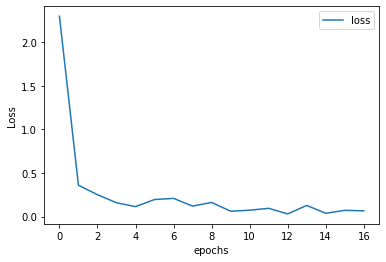

In [22]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="loss")

plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

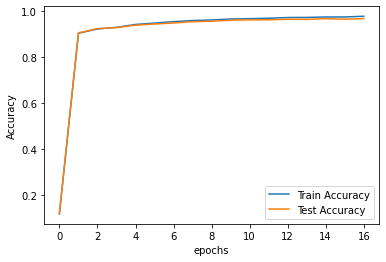

In [23]:
plt.plot(np.arange(len(train_acc_list)), train_acc_list, label="Train Accuracy")
plt.plot(np.arange(len(test_acc_list)), test_acc_list, label="Test Accuracy")

plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()